# Libraries

In [70]:
import pandas as pd
import numpy as np
import cufflinks as cf

from PIL.Image import open as open_wordcloud

import re, unicodedata

pd.set_option('display.max_columns',100)
cf.go_offline()

# Functions

In [71]:
##quita acentos,vuelve todo a minúsculas y se quitan signos 
def clean_words(text):
    res =  unicodedata.normalize('NFD', text).encode('ascii', 'ignore')
    res = re.sub("[^a-zA-Z0-9 ]"," ", res.decode("utf-8"), flags=re.UNICODE)
    res =  u' '.join(res.lower().split())
    return res

# Data Reading

In [2]:
data = pd.read_csv("fake_news_train.csv")

In [3]:
data.head()

,title,text,subject,date,fake_not
0,Barca's Valverde skirts independence debate as...,"MADRID, (Reuters) - Barcelona boss Ernesto Val...",worldnews,"October 27, 2017",0
1,Trump says Brexit wouldn't impact potential UK...,LONDON (Reuters) - Presumptive U.S. Republican...,politicsNews,"May 15, 2016",0
2,Mark Zuckerberg’s PERFECT Facebook Comment To...,There are seldom people in life that you can h...,News,"January 4, 2016",1
3,Suspected U.S. drone targets Haqqani militants...,"DERA ISMAIL KHAN, Pakistan (Reuters) - A suspe...",worldnews,"November 30, 2017",0
4,U.S. special envoy encouraged that Kurds could...,"ERBIL (Reuters) - Brett McGurk, the U.S. speci...",worldnews,"September 14, 2017",0


In [4]:
data.shape

(35918, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35918 entries, 0 to 35917
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     35918 non-null  object
 1   text      35918 non-null  object
 2   subject   35918 non-null  object
 3   date      35918 non-null  object
 4   fake_not  35918 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.4+ MB


<AxesSubplot:>

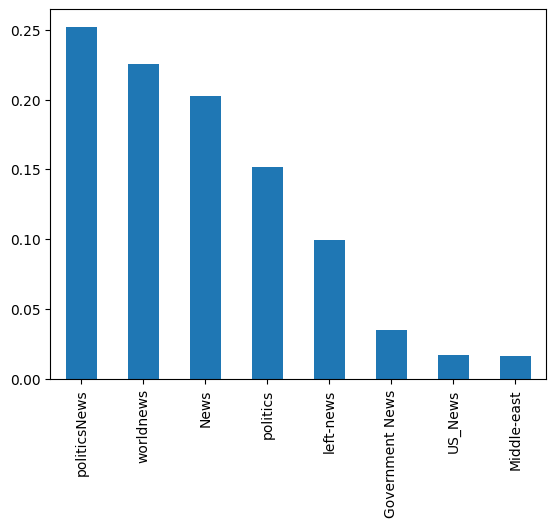

In [23]:
data["subject"].value_counts(True).plot.bar()

<AxesSubplot:>

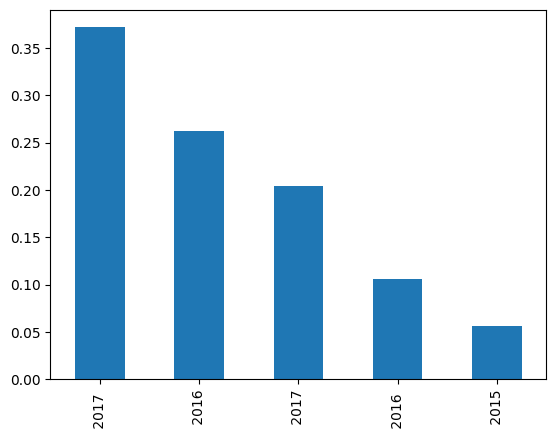

In [69]:
data["date"].str.split(",", expand=True)[1].value_counts(True).plot.bar()

In [74]:
data["title_clean"] = data["title"].map(clean_words)

data["text_clean"] = data["text"].map(clean_words)

In [77]:
data.drop(columns=["title", "text"], inplace=True)

In [78]:
data["text_clean"]

0        madrid reuters barcelona boss ernesto valverde...
1        london reuters presumptive u s republican pres...
2        there are seldom people in life that you can h...
3        dera ismail khan pakistan reuters a suspected ...
4        erbil reuters brett mcgurk the u s special env...
                               ...                        
35913    ankara reuters a turkish minister appeared to ...
35914    oslo reuters norway s liberal party will launc...
35915    reuters donald trump knows he could stand to l...
35916    amman reuters syrian rebel groups on monday re...
35917    beirut reuters lebanon s top court on friday s...
Name: text_clean, Length: 35918, dtype: object